## IMPLEMENTING SCHEMES TO SOLVE HYPERBOLIC PDES

In [75]:
import numpy
from matplotlib import pyplot
%matplotlib inline
import ipywidgets

In [76]:
# Set the font family and size to use for Matplotlib figures.
pyplot.rc('font', family='serif', size=14)


In [77]:
def rho_red_light(x, rho_max):
    rho = numpy.full_like(x, rho_max)
    mask = numpy.where(x < 3.0)
    rho[mask] /= 2
#       rho[mask] = rho_max/2
    return rho

In [78]:
#Setting Parameters
nx = 81
L = 4.0
dx = L / (nx-1)
x = numpy.linspace(0.0, L, num=nx)
sigma = 1
dt = sigma * dx / u_max
nt = 40
rho_max = 10.0
u_max = 1.0

rho0 = rho_red_light(x, rho_max)


In [79]:
def plot(n, x, rho_hist):
    pyplot.figure()
    pyplot.grid()
    pyplot.title('Time Step : {}'.format(n))
    pyplot.xlabel('Road Location [km]')
    pyplot.ylabel('Traffic Density [cars/km]')
    pyplot.plot(x, rho_hist[n])
    pyplot.xlim(x[0], x[-1])
    pyplot.ylim(4.0, 11.0)
    pyplot.show()

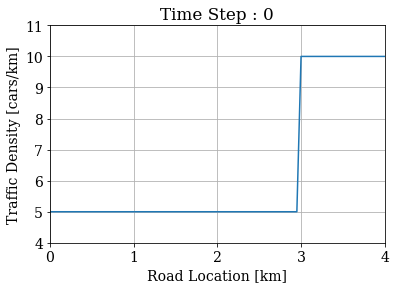

In [80]:
plot(0, x, [rho0])

In [81]:
def traffic_speed(rho, u_max, rho_max):
    return u_max * (1-rho / rho_max)

def traffic_flux(rho, u_max, rho_max):
    return rho * traffic_speed(rho, u_max, rho_max)

In [82]:
def interactive_plot(x, rho_hist):
    nt = len(rho_hist) - 1
    nt_slider = ipywidgets.IntSlider(value=0.0, min=0, max=nt, step=1, 
                                     description = 'Time Step')
    w = ipywidgets.interactive(plot, n=nt_slider, x=ipywidgets.fixed(x), 
                               rho_hist = ipywidgets.fixed(rho_hist))
    return w

In [83]:
interactive_plot(x, [rho0])


interactive(children=(IntSlider(value=0, description='Time Step', max=0), Output()), _dom_classes=('widget-int…

# LAX FRIEDRICHS METHOD

In [84]:
def lax_friedrichs(rho0, nt, dt, dx, u_max, rho_max):
    
    #creating and initializing rho_hist
    rho_hist = [rho0.copy()]
    rho = rho0.copy()
    
    """
    nx = len(rho0)
    nx = rho0.size
    for n in range(nt):
        rhon = rho.copy()
        F = traffic_flux(rhon, u_max, rho_max)
        for i in range(1, nx-1):
            rho[i] = (0.5 * (rhon[i-1] + rhon[i+1]) - dt/(2*dx) * (F[i+1] - F[i-1])
        rho_hist.append(rho.copy())
    """
    
    
    #for loop to compute the solution at each time step
    for n in range(nt):
        
        F = traffic_flux(rho, u_max, rho_max)
        rho[1:-1] = (0.5 * (rho[:-2] + rho[2:]) - dt /(2*dx) * (F[2:] - F[:-2]))
        rho_hist.append(rho.copy())
    
    #boundary conditions
    #dont change after initial solution
    
    return rho_hist

In [86]:
rho_hist = lax_friedrichs(rho0, nt, dt, dx, u_max, rho_max)

interactive_plot(x, rho_hist)

interactive(children=(IntSlider(value=0, description='Time Step', max=40), Output()), _dom_classes=('widget-in…

In [88]:
sigma = 0.5
dt = sigma * dx / u_max
nt = 80

rho_hist = lax_friedrichs(rho0, nt, dt, dx, u_max, rho_max)

interactive_plot(x, rho_hist)

interactive(children=(IntSlider(value=0, description='Time Step', max=80), Output()), _dom_classes=('widget-in…

# LAX WENDROFF METHOD

In [102]:
def traffic_jacobian(rho, u_max, rho_max):
    
    J = u_max * (1.0 - 2.0 * rho / rho_max)
    
    return J

def lax_wendroff(rho0, nt, dt, dx, u_max, rho_max):
    
    rho_hist = [rho0.copy()]
    rho = rho0.copy()
    for n in range(nt):
        F = traffic_flux(rho, u_max, rho_max)
        J = traffic_jacobian(rho, u_max, rho_max)
        rho[1:-1] = (rho[1:-1] - dt / (2.0 * dx) * (F[2:] - F[:-2]) + dt**2 / (4.0 * dx**2) *
                     ((J[1:-1] + J[2:]) * (F[2:] - F[1:-1]) - (J[:-2] + J[1:-1]) * (F[1:-1] - F[:-2])))
        rho_hist.append(rho.copy())
        
    return rho_hist

In [103]:
sigma = 1
dt = sigma * dx / u_max
nt = 40

rho_hist = lax_wendroff(rho0, nt, dt, dx, u_max, rho_max)

interactive_plot(x, rho_hist)

interactive(children=(IntSlider(value=0, description='Time Step', max=40), Output()), _dom_classes=('widget-in…

In [104]:
sigma = 0.5
dt = sigma * dx / u_max
nt = 80

rho_hist = lax_wendroff(rho0, nt, dt, dx, u_max, rho_max)

interactive_plot(x, rho_hist)

interactive(children=(IntSlider(value=0, description='Time Step', max=80), Output()), _dom_classes=('widget-in…

# MACCORMACK SCHEME

In [105]:
def maccormack(rho0, nt, dt, dx, u_max, rho_max):
    
    rho_hist = [rho0.copy()]
    rho = rho0.copy()
    rho_star = rho.copy()
    for n in range(nt):
        
        F = traffic_flux(rho, u_max, rho_max)

        rho_star[1:-1] = (rho[1:-1] -
                          dt / dx * (F[2:] - F[1:-1]))

        F = traffic_flux(rho_star, u_max, rho_max)

        rho[1:-1] = 0.5 * (rho[1:-1] + rho_star[1:-1] -
                           dt / dx * (F[1:-1] - F[:-2]))


        # Record the time-step solution.
        rho_hist.append(rho.copy())
        
    return rho_hist

In [106]:
sigma = 1
dt = sigma * dx / u_max
nt = 40

rho_hist = maccormack(rho0, nt, dt, dx, u_max, rho_max)

interactive_plot(x, rho_hist)

interactive(children=(IntSlider(value=0, description='Time Step', max=40), Output()), _dom_classes=('widget-in…